# Import Libraries

In [ ]:
import re
import nltk

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import load_npz

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_labels = pd.read_csv('/content/drive/MyDrive/Year 4/NLP notebooks and data/Data/Preprocessed/labelled_data.csv', index_col = 0)

In [ ]:
df_labels.shape

(11808, 30)

In [ ]:
df_labels.columns

Index(['id', 'address', 'city', 'placeName', 'numberOfReviews', 'placeRating',
       'webUrl', 'publishedDate', 'userRating', 'roomTip', 'review_text',
       'review_title', 'travelDate', 'tripType', 'username', 'word_tokens',
       'bpe_tokens', 'bigram_tokens', 'trigram_tokens', 'whitespace_tokens',
       'rule_based_tokens', 'spacy_tokens', 'wordpiece_tokens', 'vader_score',
       'compound_score', 'vader_category', 'flair_sentiment',
       'flair_confidence', 'textblob_sentiment', 'majority_vote'],
      dtype='object')

# Load labels (y)

In [ ]:
df_labels['majority_vote']

,majority_vote
helpfulVotes,
0.0,positive
0.0,negative
0.0,positive
0.0,positive
0.0,positive
...,...
1.0,positive
0.0,positive
1.0,positive


In [ ]:
y = df_labels['majority_vote']

In [ ]:
y.shape

(11808,)

In [ ]:
y[0].shape

(9550,)

In [ ]:
y[0]

,majority_vote
helpfulVotes,
0.0,positive
0.0,negative
0.0,positive
0.0,positive
0.0,positive
...,...
0.0,positive
0.0,positive
0.0,positive


In [ ]:
# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([2, 0, 2, ..., 2, 2, 2])

# Load vectors (X)

In [ ]:
# Load the NumPy array from the .npy file
drive_path = "/content/drive/MyDrive/Year 4/NLP notebooks and data/dense_vectors"
vec_type = 'word2vec'#'fasttext' #'word2vec' #
loaded_vectors = np.load(drive_path+f'/{vec_type}_vectors.npy')

In [ ]:
# Load the NumPy array from the .npy file
drive_path = "/content/drive/MyDrive/Year 4/NLP notebooks and data/sparse vectors"
vec_type = 'tfidf'#'tfidf' #'count' #
loaded_vectors = load_npz(drive_path+f'/{vec_type}_matrix.npz')

In [ ]:
loaded_vectors.shape

(11808, 3000)

In [ ]:
X = loaded_vectors

In [ ]:
y.value_counts()

,count
majority_vote,
positive,11227
negative,565
neutral,16


# Split Dataset

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decode the numeric labels back to original categories # TODO add later
# y_test_labels = label_encoder.inverse_transform(y_test)
# y_pred_labels = label_encoder.inverse_transform(y_pred)

## Without SMOTE

In [ ]:
# Train Random Forest model - Without SMOTE
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

## With SMOTE

In [ ]:
# With SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
rf_model_smote = RandomForestClassifier(random_state=42)

# Balanced RF Model

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(random_state=42)


# Fitting and Evaluation

In [ ]:
def fit_predict_evaluate(model, X_train, y_train, X_test, y_test, text_print = ""):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(text_print)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Balanced RF model

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


With Balanced Random Forest Model
Accuracy: 0.6100762066045724
Confusion Matrix:
 [[  34   54    4]
 [   1    3    0]
 [ 139  723 1404]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.20      0.37      0.26        92
     neutral       0.00      0.75      0.01         4
    positive       1.00      0.62      0.76      2266

    accuracy                           0.61      2362
   macro avg       0.40      0.58      0.34      2362
weighted avg       0.96      0.61      0.74      2362



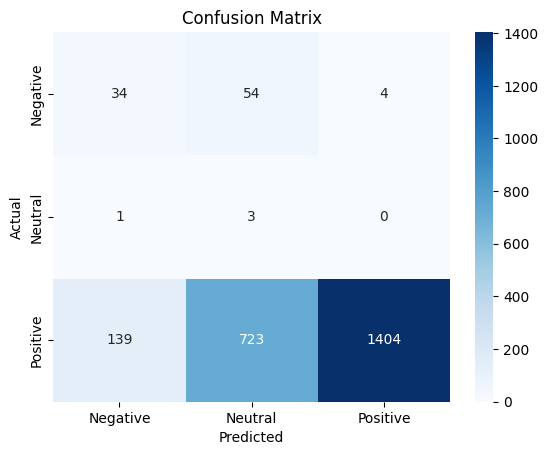

In [ ]:
fit_predict_evaluate(model =brf_model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, text_print = "With Balanced Random Forest Model")

## Without SMOTE RF moodel

Without SMOTE Random Forest
Accuracy: 0.9720575783234547
Confusion Matrix:
 [[  32    0   60]
 [   0    0    4]
 [   2    0 2264]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.35      0.51        92
     neutral       0.00      0.00      0.00         4
    positive       0.97      1.00      0.99      2266

    accuracy                           0.97      2362
   macro avg       0.64      0.45      0.50      2362
weighted avg       0.97      0.97      0.97      2362



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


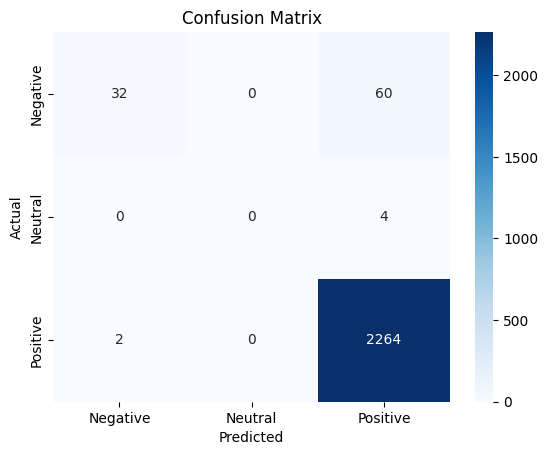

In [ ]:
fit_predict_evaluate(model =rf_model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, text_print = "Without SMOTE Random Forest")

## With SMOTE RF model

With SMOTE Random Forest
Accuracy: 0.9686706181202371
Confusion Matrix:
 [[  47    0   45]
 [   0    0    4]
 [  25    0 2241]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.65      0.51      0.57        92
     neutral       0.00      0.00      0.00         4
    positive       0.98      0.99      0.98      2266

    accuracy                           0.97      2362
   macro avg       0.54      0.50      0.52      2362
weighted avg       0.96      0.97      0.97      2362



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


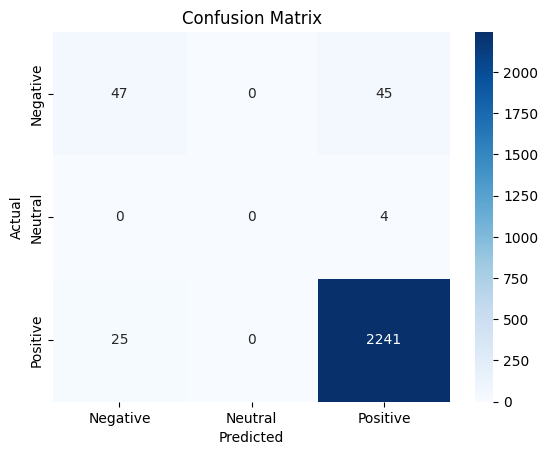

In [ ]:
fit_predict_evaluate(model =rf_model_smote, X_train=X_train_sm, y_train=y_train_sm, X_test=X_test, y_test=y_test, text_print = "With SMOTE Random Forest")